In [86]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [87]:
data=pd.read_csv("ex2data1.txt",header=None,names=['sem1','sem2','admission'])
data.head()

,sem1,sem2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


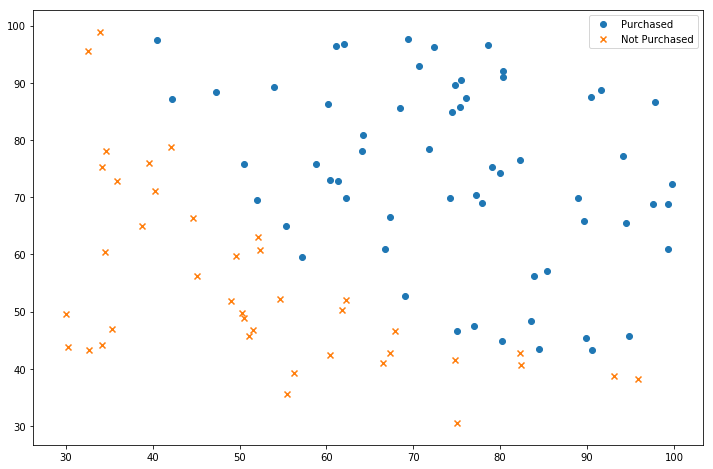

In [88]:
p=data[data['admission'].isin([1])]
n=data[data['admission'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(p['sem1'],p['sem2'],marker='o',label='Purchased')
ax.scatter(n['sem1'],n['sem2'],marker='x',label='Not Purchased')
ax.legend()
plt.show()

In [125]:
X=data.iloc[:,0:2].values
y=data.iloc[:,2].values

In [132]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=100000000000000000000)
classifier.fit(X,y)

LogisticRegression(C=100000000000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [133]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [134]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[34,  6],
       [ 5, 55]])

In [135]:
print(classifier.score(X,y))
print(classifier.predict_proba(np.array([45,85])))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print(accuracies)

0.89
[[ 0.22541844  0.77458156]]
0.89
0.0538516480713
[ 0.9  0.8  0.9  0.9  0.9  0.9  0.9  0.9  1.   0.8]


C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# adding polynomial feature

In [115]:
from sklearn.preprocessing import PolynomialFeatures
ply_reg=PolynomialFeatures(degree=2)
X_poly=ply_reg.fit_transform(X)

In [116]:
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression()
classifier2.fit(X_poly,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
y_pred2=classifier2.predict(X_poly)
y_pred2

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred2)
cm

array([[40,  0],
       [ 0, 60]])

In [124]:
print(classifier2.score(X_poly,y))
print(classifier2.predict_proba(ply_reg.fit_transform(np.array([70,65]))))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_poly, y = y, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print(accuracies)

1.0
[[  8.78126706e-07   9.99999122e-01]]
0.99
0.03
[ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]


C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
p=data[data['admission'].isin([1])]
n=data[data['admission'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(p['sem1'],p['sem2'],marker='o',label='Purchased')
ax.scatter(n['sem1'],n['sem2'],marker='x',label='Not Purchased')
ax.legend()
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = classifier2.predict(ply_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)